Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5065
           1       0.93      0.84      0.88      2172

    accuracy                           0.93      7237
   macro avg       0.93      0.90      0.92      7237
weighted avg       0.93      0.93      0.93      7237



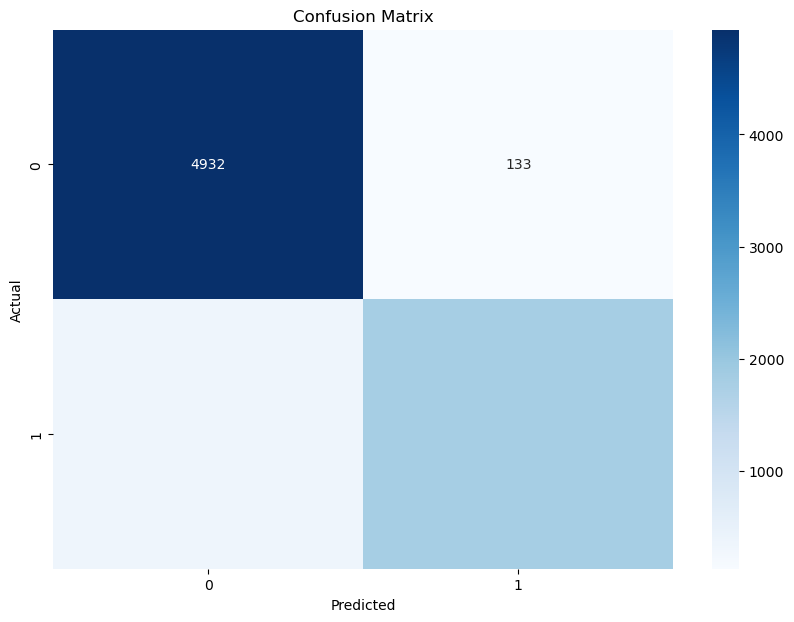

Number of Density anomalies: 140
Number of LevelOfCrowdness anomalies: 0
Number of Speed anomalies: 0


C:\Users\vashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

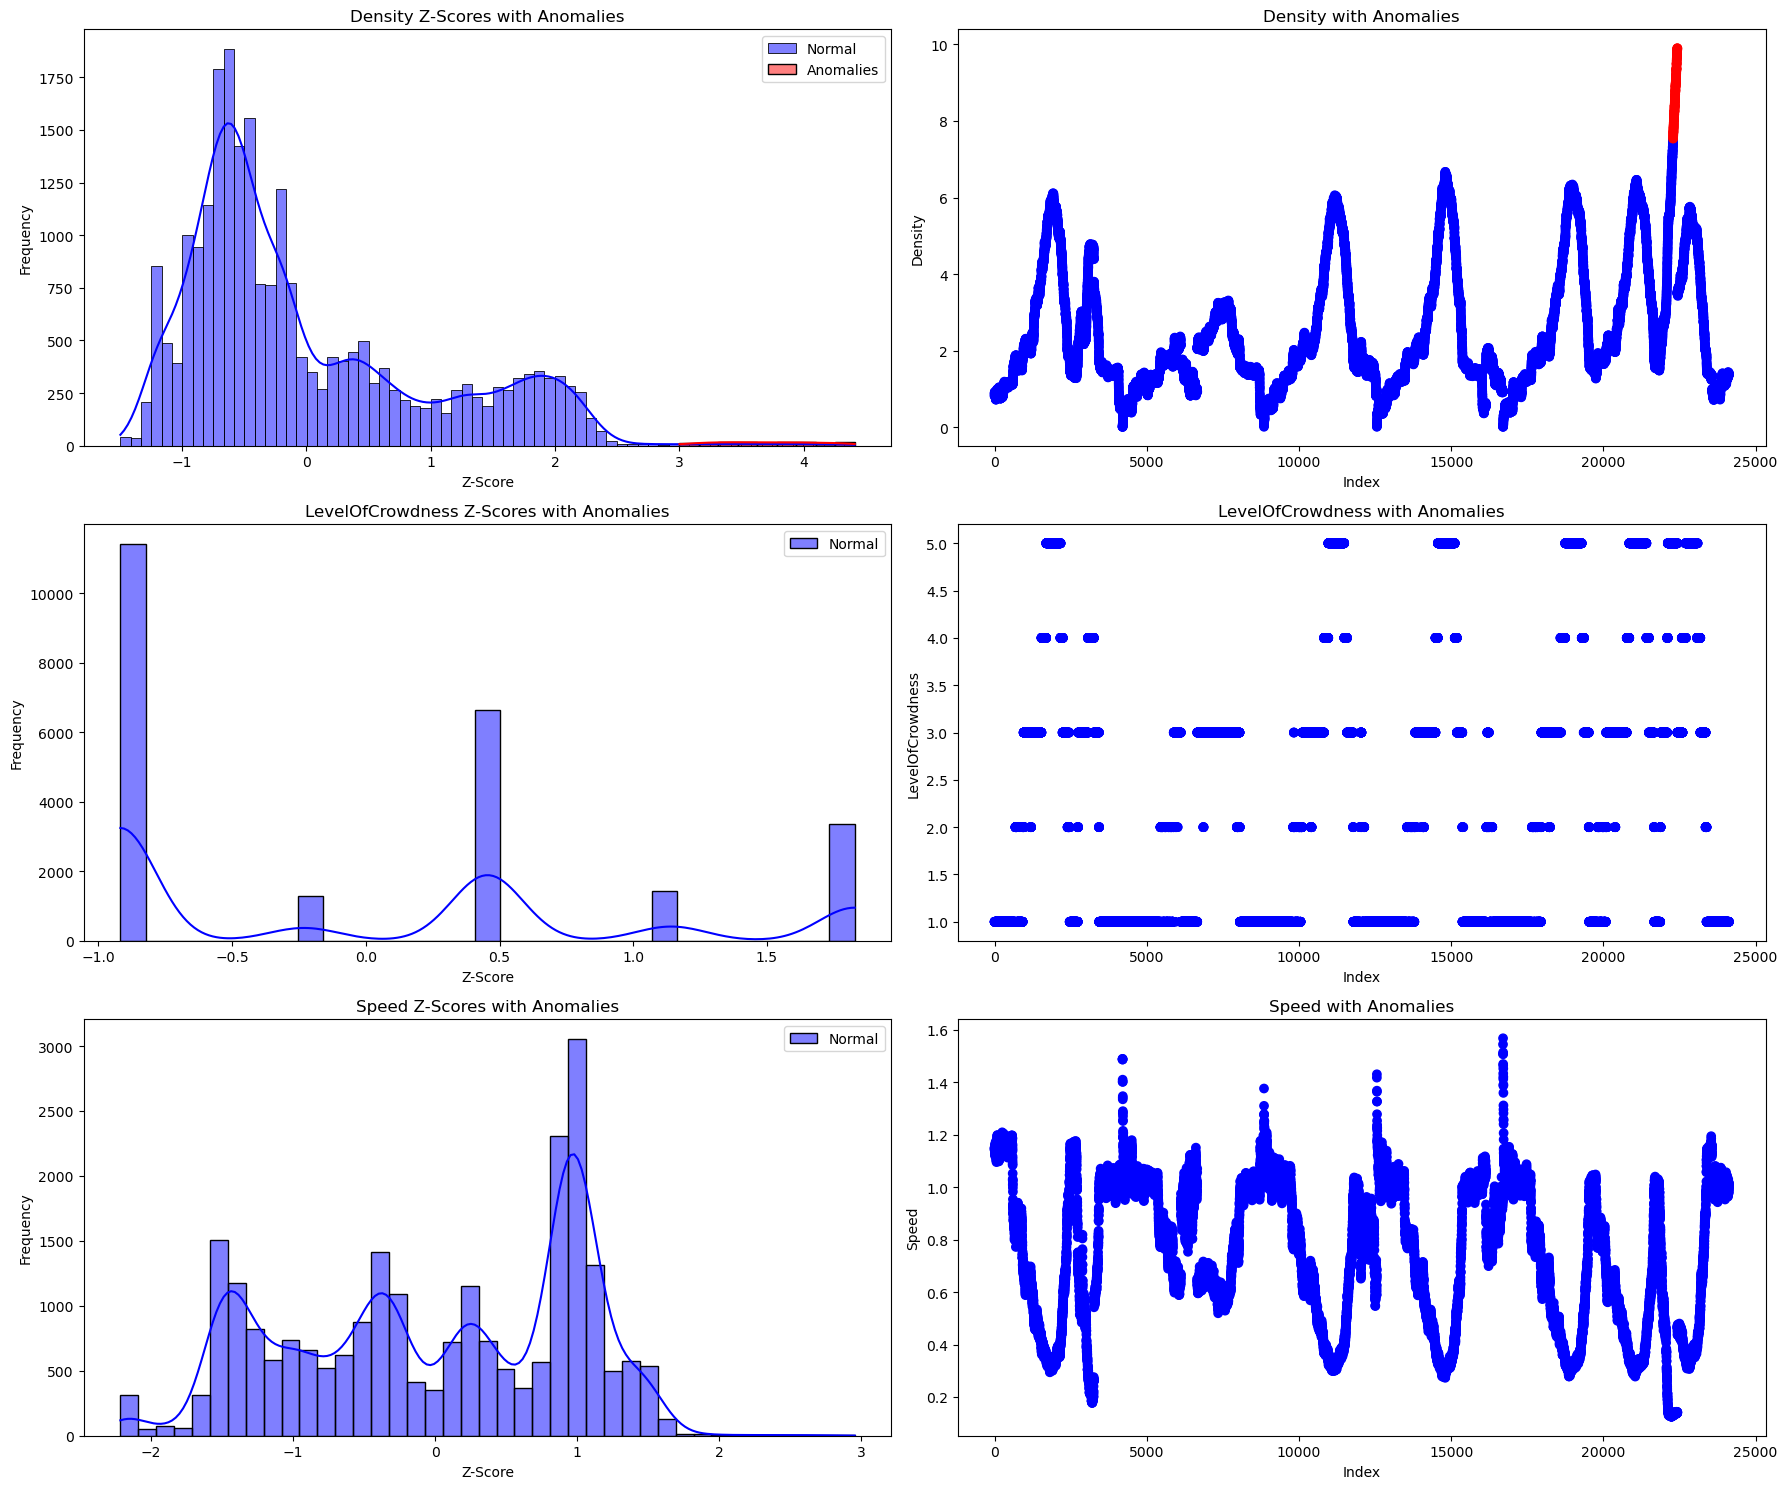

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV file
file_path = 'Crowd data for anomaly detection.csv'
data = pd.read_csv(file_path)

# Selecting relevant columns
features = ['Density', 'LevelOfCrowdness', 'Speed']
target = 'label'

# Splitting data into features and target
X = data[features]
y = data[target]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions
y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(class_report)

# Visualizing the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('CM_KNN')
plt.show()

# Function to calculate z-scores
def calculate_z_scores(column):
    mean = column.mean()
    std = column.std()
    z_scores = (column - mean) / std
    return z_scores

# Calculating z-scores for the relevant columns
data['Density_z'] = calculate_z_scores(data['Density'])
data['Crowdness_z'] = calculate_z_scores(data['LevelOfCrowdness'])
data['Speed_z'] = calculate_z_scores(data['Speed'])

# Define the threshold for anomalies
threshold = 3

# Detecting anomalies
data['Density_anomaly'] = np.abs(data['Density_z']) > threshold
data['Crowdness_anomaly'] = np.abs(data['Crowdness_z']) > threshold
data['Speed_anomaly'] = np.abs(data['Speed_z']) > threshold

# Number of anomalies
num_density_anomalies = data['Density_anomaly'].sum()
num_crowdness_anomalies = data['Crowdness_anomaly'].sum()
num_speed_anomalies = data['Speed_anomaly'].sum()

print(f'Number of Density anomalies: {num_density_anomalies}')
print(f'Number of LevelOfCrowdness anomalies: {num_crowdness_anomalies}')
print(f'Number of Speed anomalies: {num_speed_anomalies}')

# Plotting the z-scores with anomalies
plt.figure(figsize=(18, 15))

# Density z-scores with anomalies
plt.subplot(3, 2, 1)
sns.histplot(data['Density_z'], kde=True, color='blue', label='Normal')
sns.histplot(data[data['Density_anomaly']]['Density_z'], kde=True, color='red', label='Anomalies')
plt.title('Density Z-Scores with Anomalies')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Knn_z_ano.png')

# Density scatter plot with anomalies
plt.subplot(3, 2, 2)
plt.scatter(data.index, data['Density'], c=np.where(data['Density_anomaly'], 'red', 'blue'))
plt.title('Density with Anomalies')
plt.xlabel('Index')
plt.ylabel('Density')
plt.savefig('density_anomalies_knn.png')

# LevelOfCrowdness z-scores with anomalies
plt.subplot(3, 2, 3)
sns.histplot(data['Crowdness_z'], kde=True, color='blue', label='Normal')
sns.histplot(data[data['Crowdness_anomaly']]['Crowdness_z'], kde=True, color='red', label='Anomalies')
plt.title('LevelOfCrowdness Z-Scores with Anomalies')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('level_of_crowdedness_knn.png')


# LevelOfCrowdness scatter plot with anomalies
plt.subplot(3, 2, 4)
plt.scatter(data.index, data['LevelOfCrowdness'], c=np.where(data['Crowdness_anomaly'], 'red', 'blue'))
plt.title('LevelOfCrowdness with Anomalies')
plt.xlabel('Index')
plt.ylabel('LevelOfCrowdness')
plt.savefig('level_of_crowdness_anomalies_knn.png')

# Speed z-scores with anomalies
plt.subplot(3, 2, 5)
sns.histplot(data['Speed_z'], kde=True, color='blue', label='Normal')
sns.histplot(data[data['Speed_anomaly']]['Speed_z'], kde=True, color='red', label='Anomalies')
plt.title('Speed Z-Scores with Anomalies')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('knn_speed_anomalies_zscore.png')

# Speed scatter plot with anomalies
plt.subplot(3, 2, 6)
plt.scatter(data.index, data['Speed'], c=np.where(data['Speed_anomaly'], 'red', 'blue'))
plt.title('Speed with Anomalies')
plt.xlabel('Index')
plt.ylabel('Speed')
plt.savefig('knn_speed')

plt.tight_layout()
plt.show()
